In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

import seaborn as sns
import numpy as np
import matplotlib.pyplot as py

import warnings
warnings.filterwarnings("ignore")

In [0]:
def plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b']):
  
    '''
    It is to plot epoch vs Train & Test Loss. 
    
    '''
    py.figure(figsize=(15,5))
    py.title('epoch vs Train & Test Loss')
    py.xlabel('epoch') ; 
    py.ylabel('Categorical Crossentropy Loss')
    py.plot(epochs, test_loss, 'b', label="Test Loss")
    py.plot(epochs, train_loss, 'r', label="Train Loss")
    py.legend()
    py.grid(b=True)
    py.show()

In [0]:
def plot_weights(w_after_training,BatchNorm,n_layers):
  
  '''
  It is to plot weights after training. 
  
  '''
  py.figure(figsize=(15,5))
  count=0
  for i in range(0,len(w_after_training),2) if not BatchNorm else range(0,len(w_after_training),6):
    color=['y','g','b','r','g','y','g']
    weights = w_after_training[i].flatten().reshape(-1,1)
    py.subplot(1, n_layers+1, count+1)
    py.title("Trained model Weights")
    sns.violinplot(y=weights,color=color[count])
    xlabel='Output Layer' if i+2==len(w_after_training) else 'Hidden layer '+str(count+1)
    py.xlabel(xlabel)
    count+=1
  py.show()

In [6]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
print("No. of training samples :{} & each image is of size ({}X{})".format(X_train.shape[0],X_train.shape[1],X_train.shape[2]))
print("No. of test samples :{} & each image is of size ({}X{})".format(X_test.shape[0],X_test.shape[1],X_test.shape[2]))

No. of training samples :60000 & each image is of size (28X28)
No. of test samples :10000 & each image is of size (28X28)


In [7]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print("No. of training samples :{} & each image is of size ({})".format(X_train.shape[0],X_train.shape[1]))
print("No. of test samples :{} & each image is of size ({})".format(X_test.shape[0],X_test.shape[1]))

No. of training samples :60000 & each image is of size (784)
No. of test samples :10000 & each image is of size (784)


In [0]:
#Normalize the data
X_train = X_train/255
X_test = X_test/255

In [9]:
print("original output labels",y_train[1:10])
Y_train=np_utils.to_categorical(y_train,10)
Y_test=np_utils.to_categorical(y_test,10)
print("output labels with one-hot encoding \n",Y_train[1:5])
np.unique(y_train,return_counts=True)

original output labels [0 4 1 9 2 1 3 1 4]
output labels with one-hot encoding 
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [0]:
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 200 
total_epochs = 20

<h2> MLP + ReLU + ADAM+2-Layers </h2>

Train accuracy=99.818% & Test accuracy=98.08% for 20 epochs


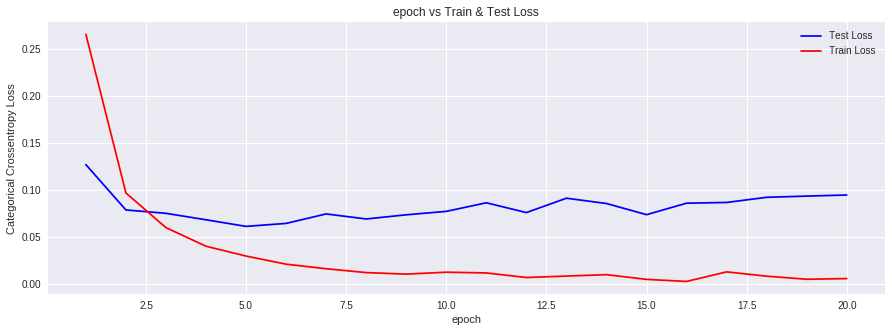

In [0]:
model_2layers=Sequential()
model_2layers.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_dim,)))
model_2layers.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_2layers.add(Dense(output_dim,activation='softmax'))

#model_2layers.summary()

model_2layers.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_2layers.fit(X_train,Y_train,batch_size=batch_size,epochs=total_epochs,verbose=0,validation_data=(X_test,Y_test))

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'.format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),total_epochs))

epochs=list(range(1,total_epochs+1))
plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b'])

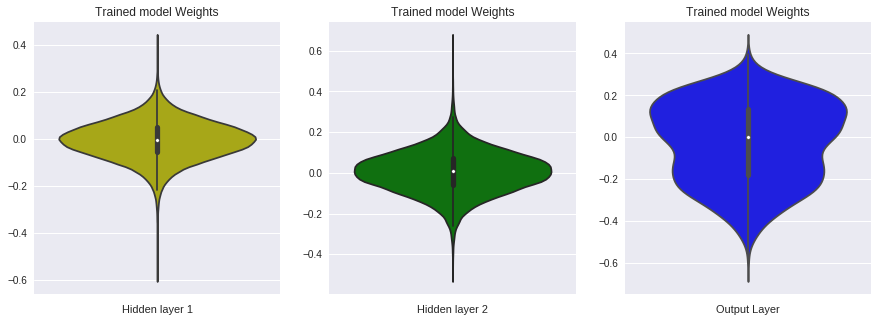

In [0]:
BatchNorm=False
n_layers=2
w_after_training=model_2layers.get_weights()
plot_weights(w_after_training,BatchNorm,n_layers)

<h2> MLP + ReLU + ADAM+2-Layers + BN</h2>

Train accuracy=99.9% & Test accuracy=98.05% for 20 epochs


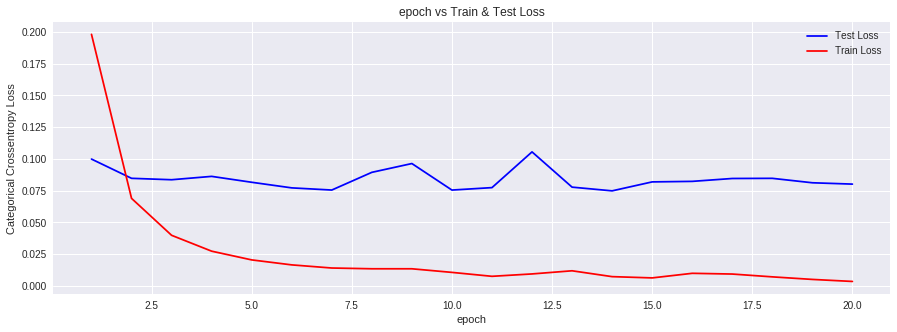

In [0]:
from keras.layers.normalization import BatchNormalization

model_2layers_bn=Sequential()
model_2layers_bn.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_dim,)))
model_2layers_bn.add(BatchNormalization())
model_2layers_bn.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_2layers_bn.add(BatchNormalization())
model_2layers_bn.add(Dense(output_dim,activation='softmax'))

#model_2layers.summary()

model_2layers_bn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_2layers_bn.fit(X_train,Y_train,batch_size=batch_size,epochs=total_epochs,verbose=0,validation_data=(X_test,Y_test))

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'.format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),total_epochs))

epochs=list(range(1,total_epochs+1))
plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b'])

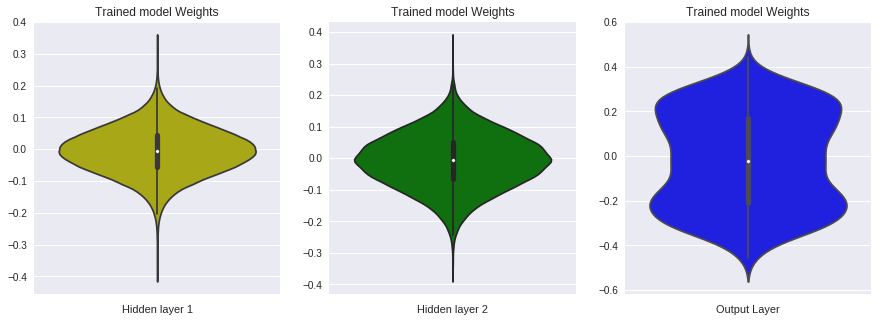

In [0]:
BatchNorm=True
n_layers=2
w_after_training=model_2layers_bn.get_weights()
plot_weights(w_after_training,BatchNorm,n_layers)

<h2> MLP + ReLU + ADAM+2-Layers + Dropout</h2>

Train accuracy=98.433% & Test accuracy=98.39% for 20 epochs


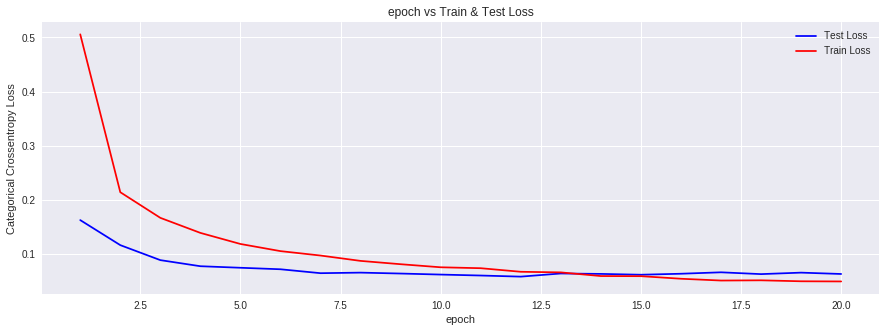

In [0]:
model_2layers_dout=Sequential()
model_2layers_dout.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_dim,)))
model_2layers_dout.add(Dropout(rate=0.5))
model_2layers_dout.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_2layers_dout.add(Dropout(rate=0.5))
model_2layers_dout.add(Dense(output_dim,activation='softmax'))

#model_2layers_dout.summary()

model_2layers_dout.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_2layers_dout.fit(X_train,Y_train,batch_size=batch_size,epochs=total_epochs,verbose=0,validation_data=(X_test,Y_test))

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'.format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),total_epochs))

epochs=list(range(1,total_epochs+1))
plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b'])

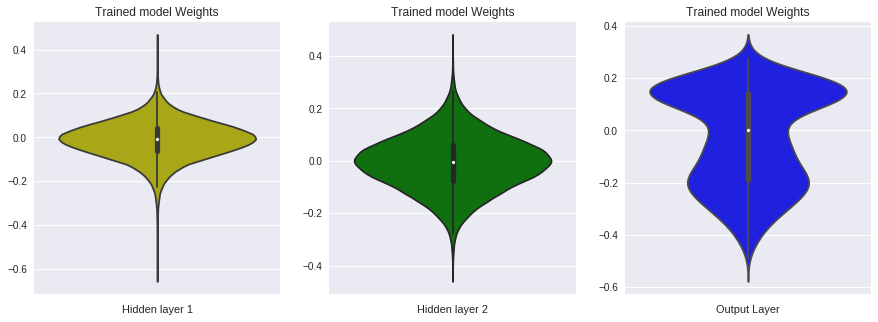

In [0]:
BatchNorm=False
n_layers=2
w_after_training=model_2layers_dout.get_weights()
plot_weights(w_after_training,BatchNorm,n_layers)

<h2> MLP + ReLU + ADAM + 2-Layers + BN + Dropout </h2>

Train accuracy=98.365% & Test accuracy=98.32% for 20 epochs


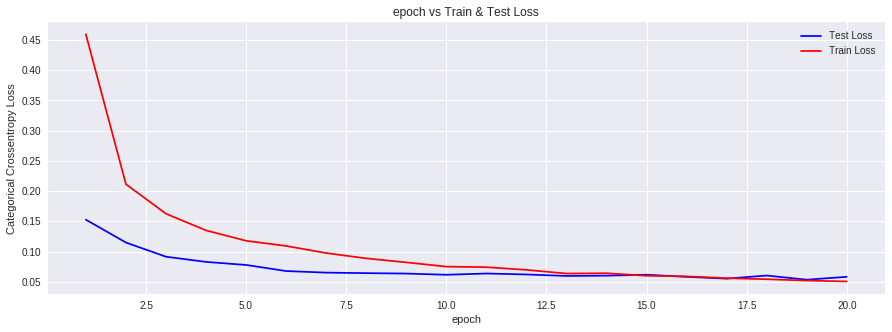

In [0]:
model_2layers_bn_dout=Sequential()
model_2layers_bn_dout.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_dim,)))
model_2layers_bn_dout.add(BatchNormalization())
model_2layers_bn_dout.add(Dropout(rate=0.5))
model_2layers_bn_dout.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_2layers_bn_dout.add(BatchNormalization())
model_2layers_bn_dout.add(Dropout(rate=0.5))
model_2layers_bn_dout.add(Dense(output_dim,activation='softmax'))

#model_2layers_bn_dout.summary()

model_2layers_bn_dout.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_2layers_bn_dout.fit(X_train,Y_train,batch_size=batch_size,epochs=total_epochs,verbose=0,validation_data=(X_test,Y_test))

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'.format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),total_epochs))

epochs=list(range(1,total_epochs+1))
plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b'])

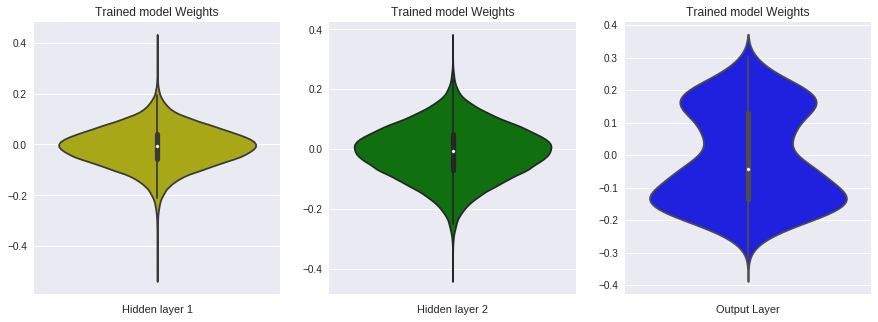

In [0]:
BatchNorm=True
n_layers=2
w_after_training=model_2layers_bn_dout.get_weights()
plot_weights(w_after_training,BatchNorm,n_layers)

<h2> MLP + ReLU + ADAM+3-Layers </h2>

Train accuracy=99.785% & Test accuracy=98.12% for 20 epochs


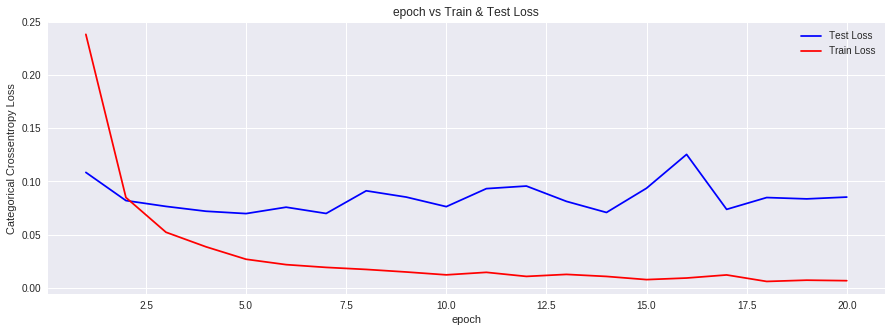

In [0]:
model_3layers=Sequential()
model_3layers.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_dim,)))
model_3layers.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model_3layers.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_3layers.add(Dense(output_dim,activation='softmax'))

#model_3layers.summary()

model_3layers.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_3layers.fit(X_train,Y_train,batch_size=batch_size,epochs=total_epochs,verbose=0,validation_data=(X_test,Y_test))

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'.format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),total_epochs))

epochs=list(range(1,total_epochs+1))
plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b'])

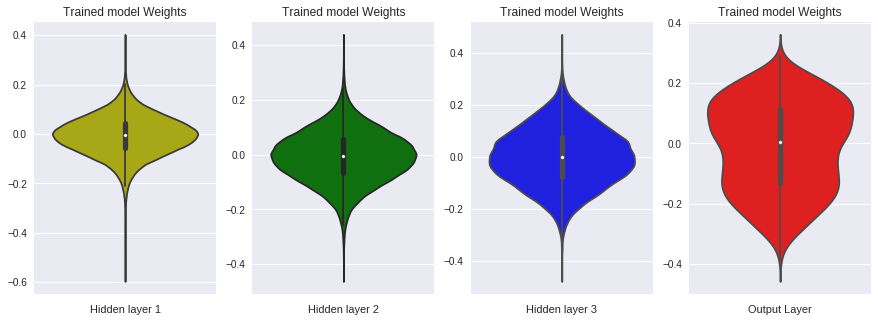

In [0]:
BatchNorm=False
n_layers=3
w_after_training=model_3layers.get_weights()
plot_weights(w_after_training,BatchNorm,n_layers)

<h2> MLP + ReLU + ADAM+3-Layers + BN</h2>

Train accuracy=99.728% & Test accuracy=97.93% for 20 epochs


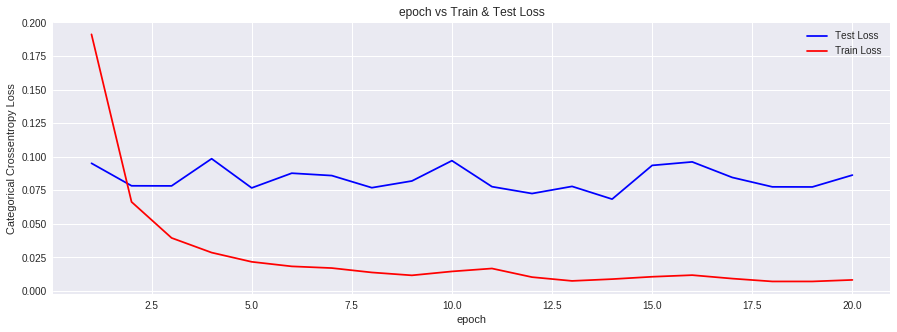

In [0]:
model_3layers_bn=Sequential()
model_3layers_bn.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_dim,)))
model_3layers_bn.add(BatchNormalization())
model_3layers_bn.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model_3layers_bn.add(BatchNormalization())
model_3layers_bn.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_3layers_bn.add(BatchNormalization())
model_3layers_bn.add(Dense(output_dim,activation='softmax'))

#model_3layers_bn.summary()

model_3layers_bn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_3layers_bn.fit(X_train,Y_train,batch_size=batch_size,epochs=total_epochs,verbose=0,validation_data=(X_test,Y_test))

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'.format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),total_epochs))

epochs=list(range(1,total_epochs+1))
plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b'])

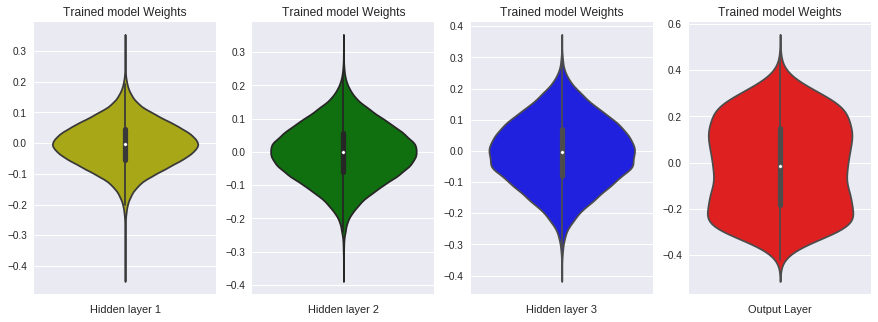

In [0]:
BatchNorm=True
n_layers=3
w_after_training=model_3layers_bn.get_weights()
plot_weights(w_after_training,BatchNorm,n_layers)

<h2> MLP + ReLU + ADAM+3-Layers + Dropout</h2>

Train accuracy=98.318% & Test accuracy=98.26% for 20 epochs


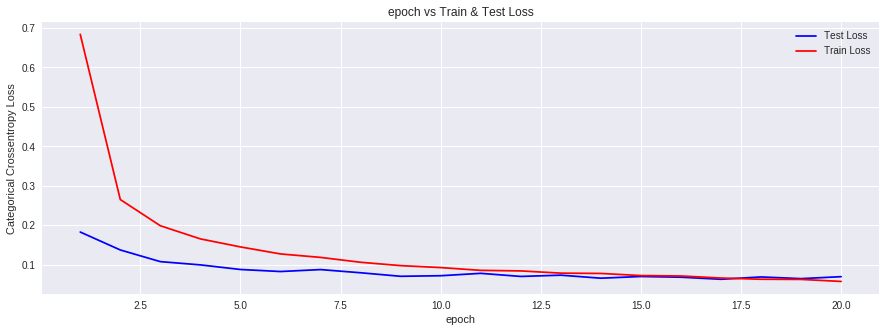

In [0]:
model_3layers_dout=Sequential()
model_3layers_dout.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_dim,)))
model_3layers_dout.add(Dropout(rate=0.5))
model_3layers_dout.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model_3layers_dout.add(Dropout(rate=0.5))
model_3layers_dout.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_3layers_dout.add(Dropout(rate=0.5))
model_3layers_dout.add(Dense(output_dim,activation='softmax'))

#model_3layers_dout.summary()

model_3layers_dout.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_3layers_dout.fit(X_train,Y_train,batch_size=batch_size,epochs=total_epochs,verbose=0,validation_data=(X_test,Y_test))

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'.format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),total_epochs))

epochs=list(range(1,total_epochs+1))
plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b'])

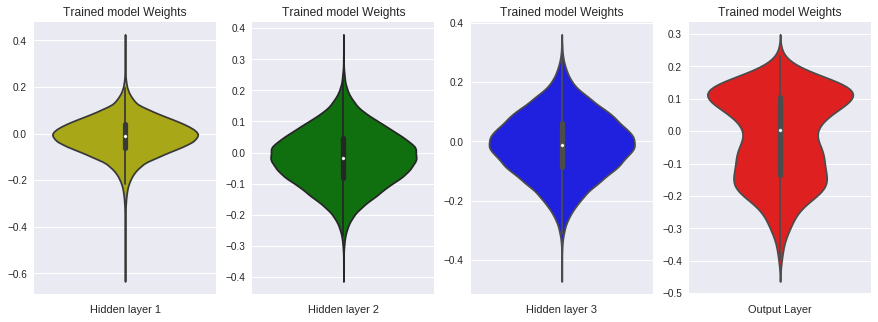

In [0]:
BatchNorm=False
n_layers=3
w_after_training=model_3layers_dout.get_weights()
plot_weights(w_after_training,BatchNorm,n_layers)

<h2> MLP + ReLU + ADAM + 3-Layers + BN + Dropout </h2>

Train accuracy=98.217% & Test accuracy=98.31% for 20 epochs


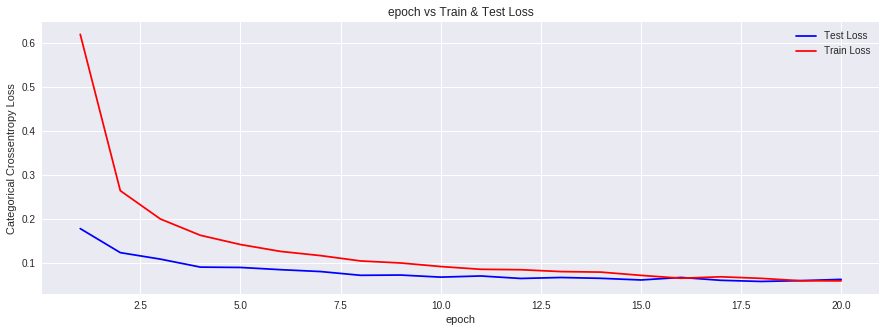

In [0]:
model_3layers_bn_dout=Sequential()
model_3layers_bn_dout.add(Dense(512,activation='relu',kernel_initializer='he_normal',input_shape=(input_dim,)))
model_3layers_bn_dout.add(BatchNormalization())
model_3layers_bn_dout.add(Dropout(rate=0.5))

model_3layers_bn_dout.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model_3layers_bn_dout.add(BatchNormalization())
model_3layers_bn_dout.add(Dropout(rate=0.5))

model_3layers_bn_dout.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model_3layers_bn_dout.add(BatchNormalization())
model_3layers_bn_dout.add(Dropout(rate=0.5))

model_3layers_bn_dout.add(Dense(output_dim,activation='softmax'))

#model_3layers_bn_dout.summary()

model_3layers_bn_dout.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_3layers_bn_dout.fit(X_train,Y_train,batch_size=batch_size,epochs=total_epochs,verbose=0,validation_data=(X_test,Y_test))

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'.format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),total_epochs))

epochs=list(range(1,total_epochs+1))
plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b'])

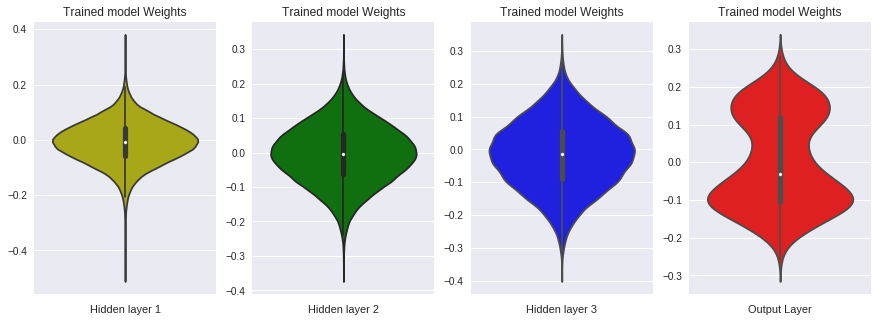

In [0]:
BatchNorm=True
n_layers=3
w_after_training=model_3layers_bn_dout.get_weights()
plot_weights(w_after_training,BatchNorm,n_layers)

<h2> MLP + ReLU + ADAM+5-Layers </h2>

Train accuracy=99.685% & Test accuracy=98.09% for 20 epochs


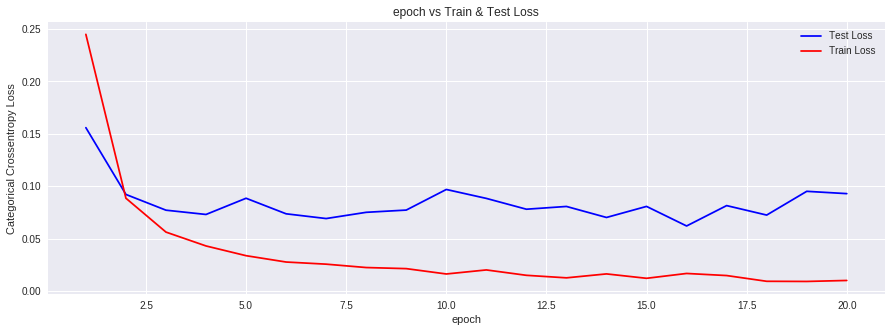

In [0]:
model_5layers=Sequential()
model_5layers.add(Dense(500,activation='relu',kernel_initializer='he_normal',input_shape=(input_dim,)))
model_5layers.add(Dense(400,activation='relu',kernel_initializer='he_normal'))
model_5layers.add(Dense(300,activation='relu',kernel_initializer='he_normal'))
model_5layers.add(Dense(200,activation='relu',kernel_initializer='he_normal'))
model_5layers.add(Dense(100,activation='relu',kernel_initializer='he_normal'))
model_5layers.add(Dense(output_dim,activation='softmax'))

#model_5layers.summary()

model_5layers.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_5layers.fit(X_train,Y_train,batch_size=batch_size,epochs=total_epochs,verbose=0,validation_data=(X_test,Y_test))

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'.format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),total_epochs))

epochs=list(range(1,total_epochs+1))
plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b'])

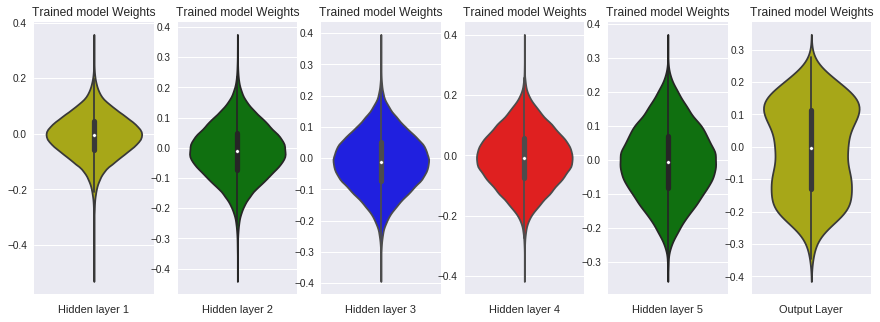

In [0]:
BatchNorm=False
n_layers=5
w_after_training=model_5layers.get_weights()
plot_weights(w_after_training,BatchNorm,n_layers)

<h2> MLP + ReLU + ADAM+5-Layers + BN</h2>

Train accuracy=99.627% & Test accuracy=98.03% for 20 epochs


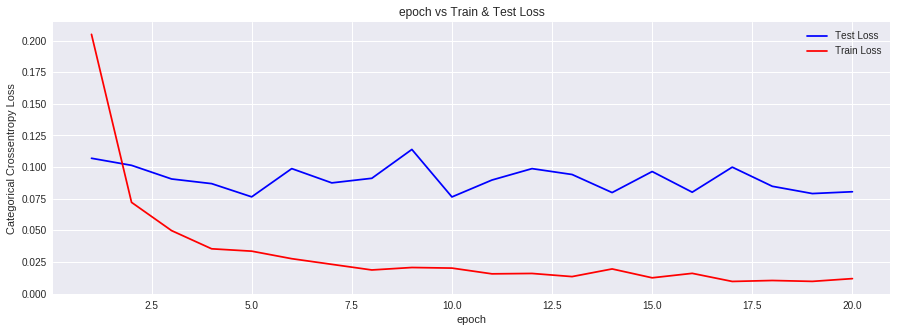

In [0]:
model_5layers_bn=Sequential()
model_5layers_bn.add(Dense(500,activation='relu',kernel_initializer='he_normal',input_shape=(input_dim,)))
model_5layers_bn.add(BatchNormalization())

model_5layers_bn.add(Dense(400,activation='relu',kernel_initializer='he_normal'))
model_5layers_bn.add(BatchNormalization())

model_5layers_bn.add(Dense(300,activation='relu',kernel_initializer='he_normal'))
model_5layers_bn.add(BatchNormalization())

model_5layers_bn.add(Dense(200,activation='relu',kernel_initializer='he_normal'))
model_5layers_bn.add(BatchNormalization())

model_5layers_bn.add(Dense(100,activation='relu',kernel_initializer='he_normal'))
model_5layers_bn.add(BatchNormalization())

model_5layers_bn.add(Dense(output_dim,activation='softmax'))

#model_5layers_bn.summary()

model_5layers_bn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_5layers_bn.fit(X_train,Y_train,batch_size=batch_size,epochs=total_epochs,verbose=0,validation_data=(X_test,Y_test))

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'.format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),total_epochs))

epochs=list(range(1,total_epochs+1))
plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b'])

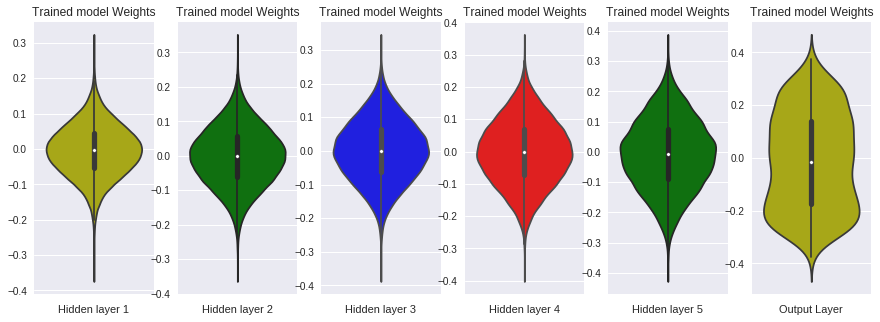

In [0]:
BatchNorm=True
n_layers=5
w_after_training=model_5layers_bn.get_weights()
plot_weights(w_after_training,BatchNorm,n_layers)

<h2> MLP + ReLU + ADAM+5-Layers + Dropout</h2>

Train accuracy=98.633% & Test accuracy=98.27% for 40 epochs


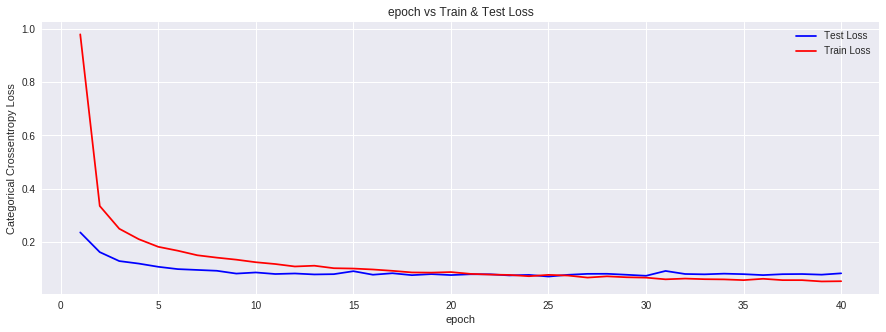

In [0]:
total_epochs=40
model_5layers_dout=Sequential()
model_5layers_dout.add(Dense(500,activation='relu',kernel_initializer='he_normal',input_shape=(input_dim,)))
model_5layers_dout.add(Dropout(rate=0.5))

model_5layers_dout.add(Dense(400,activation='relu',kernel_initializer='he_normal'))
model_5layers_dout.add(Dropout(rate=0.5))

model_5layers_dout.add(Dense(300,activation='relu',kernel_initializer='he_normal'))
#model_5layers_dout.add(Dropout(rate=0.5))

model_5layers_dout.add(Dense(200,activation='relu',kernel_initializer='he_normal'))
model_5layers_dout.add(Dropout(rate=0.5))

model_5layers_dout.add(Dense(100,activation='relu',kernel_initializer='he_normal'))
model_5layers_dout.add(Dropout(rate=0.5))

model_5layers_dout.add(Dense(output_dim,activation='softmax'))

#model_5layers_dout.summary()

model_5layers_dout.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_5layers_dout.fit(X_train,Y_train,batch_size=batch_size,epochs=total_epochs,verbose=0,validation_data=(X_test,Y_test))

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'.format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),total_epochs))

epochs=list(range(1,total_epochs+1))
plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b'])

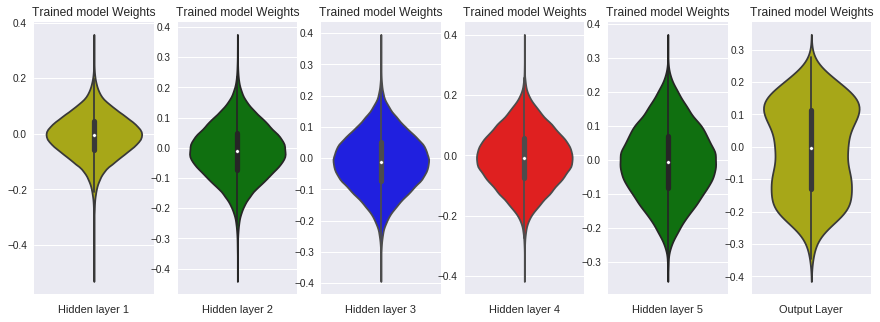

In [0]:
BatchNorm=False
n_layers=5
w_after_training=model_5layers.get_weights()
plot_weights(w_after_training,BatchNorm,n_layers)

<h2> MLP + ReLU + ADAM + 5-Layers + BN + Dropout </h2>

Train accuracy=98.745% & Test accuracy=98.43% for 40 epochs


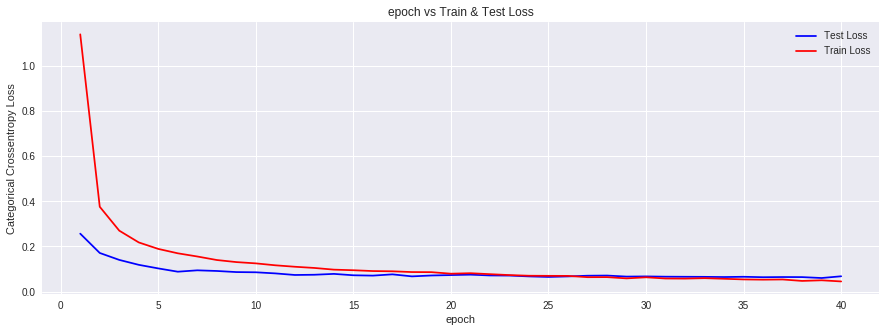

In [12]:
total_epochs=40
model_5layers_bn_dout=Sequential()
model_5layers_bn_dout.add(Dense(500,activation='relu',kernel_initializer='he_normal',input_shape=(input_dim,)))
model_5layers_bn_dout.add(BatchNormalization())
model_5layers_bn_dout.add(Dropout(rate=0.5))

model_5layers_bn_dout.add(Dense(400,activation='relu',kernel_initializer='he_normal'))
model_5layers_bn_dout.add(BatchNormalization())
model_5layers_bn_dout.add(Dropout(rate=0.5))

model_5layers_bn_dout.add(Dense(300,activation='relu',kernel_initializer='he_normal'))
model_5layers_bn_dout.add(BatchNormalization())
model_5layers_bn_dout.add(Dropout(rate=0.5))

model_5layers_bn_dout.add(Dense(200,activation='relu',kernel_initializer='he_normal'))
model_5layers_bn_dout.add(BatchNormalization())
model_5layers_bn_dout.add(Dropout(rate=0.5))

model_5layers_bn_dout.add(Dense(100,activation='relu',kernel_initializer='he_normal'))
model_5layers_bn_dout.add(BatchNormalization())
model_5layers_bn_dout.add(Dropout(rate=0.5))

model_5layers_bn_dout.add(Dense(output_dim,activation='softmax'))

#model_5layers_bn_dout.summary()

model_5layers_bn_dout.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_5layers_bn_dout.fit(X_train,Y_train,batch_size=batch_size,epochs=total_epochs,verbose=0,validation_data=(X_test,Y_test))

train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_acc=history.history['acc']
test_acc=history.history['val_acc']

print('Train accuracy={}% & Test accuracy={}% for {} epochs'.format(np.round(train_acc[-1]*100,3),np.round(test_acc[-1]*100,3),total_epochs))

epochs=list(range(1,total_epochs+1))
plot_epoch_vs_loss(epochs,test_loss,train_loss,colors=['b'])

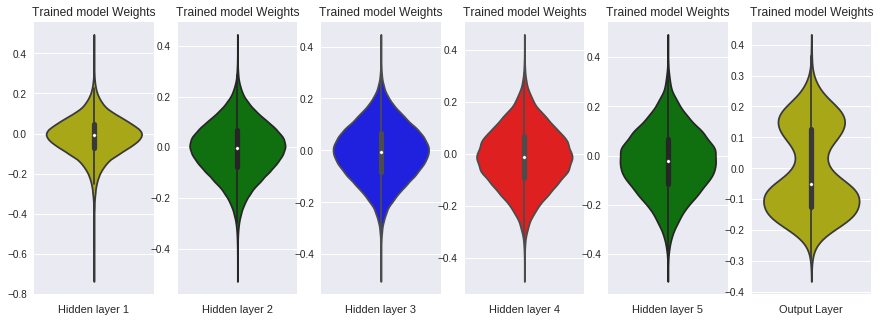

In [13]:
BatchNorm=True
n_layers=5
w_after_training=model_5layers_bn_dout.get_weights()
plot_weights(w_after_training,BatchNorm,n_layers)

In [0]:
from prettytable import PrettyTable

x = PrettyTable()

x.title = 'Performance Metrics from Deep Learning Analysis'
x.field_names = ["n_layers","epochs","Batch Norm","Dropout","Train accuracy(%)","Test accuracy(%)","Model Status"]

x.add_row([2,20,"No","No",99.81,98.08,"Overfitting"])
x.add_row([2,20,"Yes","No",99.90,98.05,"Overfitting"])
x.add_row([2,20,"No","Yes(rate=0.5)",98.433,98.39,"well-fitted"])
x.add_row([2,20,"Yes","Yes(rate=0.5)",98.365,98.32,"well-fitted"])

x.add_row([3,20,"No","No",99.785,98.12,"Overfitting"])
x.add_row([3,20,"Yes","No",99.728,97.93,"Overfitting"])
x.add_row([3,20,"No","Yes(rate=0.5)",98.318,98.26,"well-fitted"])
x.add_row([3,20,"Yes","Yes(rate=0.5)",98.217,98.31,"well-fitted"])

x.add_row([5,20,"No","No",99.685,98.09,"Overfitting"])
x.add_row([5,20,"Yes","No",99.627,98.03,"Overfitting"])
x.add_row([5,40,"No","Yes(rate=0.5)",98.633,98.27,"well-fitted"])
x.add_row([5,40,"Yes","Yes(rate=0.5)",98.745,98.43,"well-fitted"])

## Overall Observations:

In [18]:
Performance Metrics from Deep Learning Analysis:

+----------+--------+------------+---------------+-------------------+------------------+--------------+
| n_layers | epochs | Batch Norm |    Dropout    | Train accuracy(%) | Test accuracy(%) | Model Status |
+----------+--------+------------+---------------+-------------------+------------------+--------------+
|    2     |   20   |     No     |       No      |       99.81       |      98.08       | Overfitting  |
|    2     |   20   |    Yes     |       No      |        99.9       |      98.05       | Overfitting  |
|    2     |   20   |     No     | Yes(rate=0.5) |       98.433      |      98.39       | well-fitted  |
|    2     |   20   |    Yes     | Yes(rate=0.5) |       98.365      |      98.32       | well-fitted  |
|    3     |   20   |     No     |       No      |       99.785      |      98.12       | Overfitting  |
|    3     |   20   |    Yes     |       No      |       99.728      |      97.93       | Overfitting  |
|    3     |   20   |     No     | Yes(rate=0.5) |     

1) The deep learning MLP's are overfitting without a dropout layer in the network. It is mandatory to have dropout layer in MLP's for a well-fitted model.    

2) Using batch normalization the distribution of the inputs remained similar for all the activation units across the network. 

3) The weights of the models after training are not very small or large. So we should not be into the problem of vanishing or exploding gradient. 

4) The loss decreased as we train the MLP for multiple epoch's, after certain epochs the model tend to overfit. 

5) In 5-layer MLP using dropout rate=0.5 at each layer, it took more epochs(~40) for training a well-fitted model. 